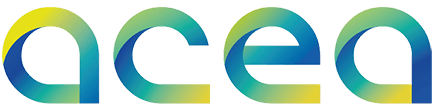

## Welcome note:

### First we need to thank ACEA group to give this problem to Kaggle Competitions. The world is running into water scarcity. Water is going to be a high valued commodity. 

### So by understanding its characteristics we can predict the water levels in different water sources as provided here. 

1. Aquifer
2. Water Spring
3. River
4. Lake

## Water Sources Overview:

### 1. Aquifer:
An aquifer is an underground layer of water-bearing permeable rock, rock fractures or unconsolidated materials (gravel, sand, or silt). Groundwater can be extracted using a water well. The study of water flow in aquifers and the characterization of aquifers is called hydrogeology. 

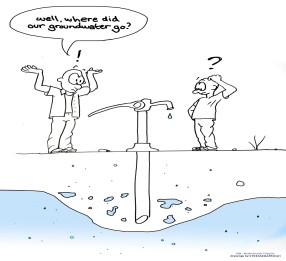

We have 4 Aquifers from this data
1. Auser
2. Doganella
3. Luco
4. Petrignano

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Libraries

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
a_d = pd.read_csv("/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv")
a_u = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Auser.csv')
a_l = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Luco.csv')
a_p = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv')

## Aquifer - Doganella Exploration

### Missing values

In [ ]:
round((a_d.isnull().sum()/a_d.shape[0])*100,2)

### Rainfall Exploration

In [ ]:
a_d.Date = pd.to_datetime(a_d.Date)
a_d = a_d[a_d['Rainfall_Monteporzio'].notna()]
year = a_d.Date.dt.year
fig = px.box(a_d, x= year, y="Rainfall_Monteporzio", title='Rainfall - Monteporzio')
fig1 = px.bar(a_d, x= year, y="Rainfall_Monteporzio", title='Rainfall - Monteporzio', color = 'Rainfall_Monteporzio')
fig.show()
fig1.show()

In [ ]:
a_d = a_d[a_d['Rainfall_Velletri'].notna()]
year = a_d.Date.dt.year
fig = px.box(a_d, x= year, y="Rainfall_Velletri", title='Rainfall - Velletri')
fig1 = px.bar(a_d, x= year, y="Rainfall_Velletri", title='Rainfall - Velletri', color = 'Rainfall_Velletri')
fig.show()
fig1.show()

In [ ]:
rainfall_mean = a_d.groupby(a_d.Date.dt.year)['Rainfall_Monteporzio','Rainfall_Velletri'].mean().reset_index()
fig = px.line(rainfall_mean, x='Date', y=['Rainfall_Monteporzio','Rainfall_Velletri'], title='Mean at Doganella')
fig.show()

Rainfall is little higher at Velletri compare to Monteporzio

So water availablity or volume is little higher there at Velletri

### Temperature Exploration

In [ ]:
fig = px.box(a_d, x= year, y="Temperature_Monteporzio", title='Mean Temperature at Monteporzio '+str(round(a_d['Temperature_Monteporzio'].mean(),2)))
fig.show()

In [ ]:
fig = px.box(a_d, x= year, y="Temperature_Velletri", title='Mean Temperature at Velletri '+str(round(a_d['Temperature_Velletri'].mean(),2)))
fig.show()

Compare to Monteporzio Velletri is having high temprature throught out the years.

In [ ]:
tmp_mean = a_d.groupby(a_d.Date.dt.year)['Temperature_Monteporzio','Temperature_Velletri'].mean().reset_index()
fig = px.line(tmp_mean, x='Date', y=['Temperature_Monteporzio','Temperature_Velletri'], title='Mean Temperature at Doganella')
fig.show()

In [ ]:
a_d.Depth_to_Groundwater_Pozzo_1.value_counts()
fig = px.box(a_d, x= year, y="Depth_to_Groundwater_Pozzo_1", title='Mean Temperature at Velletri '+str(round(a_d['Depth_to_Groundwater_Pozzo_1'].mean(),2)))
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=3)
year = a_d.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_1'],
    name = 'Pozzo_1',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_2'],
    name = 'Pozzo_2',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_3'],
    name = 'Pozzo_3',
), row=1, col=3)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_4'],
    name = 'Pozzo_4',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_5'],
    name = 'Pozzo_5',
), row=2, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_6'],
    name = 'Pozzo_6',
), row=2, col=3)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_7'],
    name = 'Pozzo_7',
), row=3, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_8'],
    name = 'Pozzo_8',
), row=3, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Depth_to_Groundwater_Pozzo_9'],
    name = 'Pozzo_9',
), row=3, col=3)


fig.update_layout(height=600, width=800, title_text="Ground water depth at Pazzo")
fig.show()

At pozzo, there are 9 differnet places observed to know about depth of Ground water. Almost most of the places have the indication that water level gone low in recetn years. Meanwhile seeing the Rainfall plots, there was also drastic decrease in rainfall. By default, Rain is the only source of water. 

In [ ]:
fig = make_subplots(rows=4, cols=2)
year = a_d.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_1'],
    name = 'Pozzo_1',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_2'],
    name = 'Pozzo_2',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_3'],
    name = 'Pozzo_3',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_4'],
    name = 'Pozzo_4',
), row=2, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_5+6'],
    name = 'Pozzo_5',
), row=3, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_7'],
    name = 'Pozzo_6',
), row=3, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_8'],
    name = 'Pozzo_7',
), row=4, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_d['Volume_Pozzo_9'],
    name = 'Pozzo_8',
), row=4, col=2)


fig.update_layout(height=1000, width=800, title_text="Water Volume at Pazzo")
fig.show()

## Aquifer - Auser Exploration

In [ ]:
round((a_u.isnull().sum()/a_u.shape[0])*100,2)

In [ ]:
rn_mean = a_u.groupby(a_d.Date.dt.year)['Rainfall_Gallicano','Rainfall_Pontetetto','Rainfall_Monte_Serra','Rainfall_Orentano','Rainfall_Borgo_a_Mozzano','Rainfall_Piaggione','Rainfall_Calavorno','Rainfall_Croce_Arcana','Rainfall_Tereglio_Coreglia_Antelminelli','Rainfall_Fabbriche_di_Vallico'].mean().reset_index()
fig = px.line(rn_mean, x='Date', y=['Rainfall_Gallicano','Rainfall_Pontetetto','Rainfall_Monte_Serra','Rainfall_Orentano','Rainfall_Borgo_a_Mozzano','Rainfall_Piaggione','Rainfall_Calavorno','Rainfall_Croce_Arcana','Rainfall_Tereglio_Coreglia_Antelminelli','Rainfall_Fabbriche_di_Vallico'], title='Mean Rainfall at Auser')
fig.show()

In the list of 10 places, Average rainfall are following similar pattern but in different value range.

In [ ]:
a_u.Date = pd.to_datetime(a_u.Date)
fig = make_subplots(rows=3, cols=2)
year = a_u.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_u['Depth_to_Groundwater_LT2'],
    name = 'LT2',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Depth_to_Groundwater_SAL'],
    name = 'SAL',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Depth_to_Groundwater_PAG'],
    name = 'PAG',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Depth_to_Groundwater_CoS'],
    name = 'CoS',
), row=2, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Depth_to_Groundwater_DIEC'],
    name = 'DIEC',
), row=3, col=1)


fig.update_layout(height=1000, width=800, title_text="Ground water depth at Auser")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2)
year = a_u.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_u['Temperature_Orentano'],
    name = 'Orentano',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Temperature_Monte_Serra'],
    name = 'Monte_Serra',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Temperature_Ponte_a_Moriano'],
    name = 'Ponte_a_Moriano',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Temperature_Lucca_Orto_Botanico'],
    name = 'Lucca_Orto_Botanico',
), row=2, col=2)

fig.update_layout(height=1000, width=800, title_text="Temprature at Auser")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=2)
year = a_u.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_u['Volume_POL'],
    name = 'POL',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Volume_CC1'],
    name = 'CC1',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Volume_CC2'],
    name = 'CC2',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Volume_CSA'],
    name = 'CSA',
), row=2, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_u['Volume_CSAL'],
    name = 'CSAL',
), row=3, col=1)

fig.update_layout(height=1000, width=800, title_text="Water volume at Auser")
fig.show()

POL, CSA, CSAL are newly created Water Storing places. Because of decrease in rainfall in last few years, water volume is also decreased.

### Hyderometry
Hydrometry is the monitoring of the components of the hydrological cycle including rainfall, groundwater characteristics, as well as water quality and flow characteristics of surface waters. 

In [ ]:
fig = px.box(a_u, x= year, y="Hydrometry_Monte_S_Quirico", title='Hydrometry at Monte_S_Quirico '+str(round(a_u['Hydrometry_Monte_S_Quirico'].mean(),2)))
fig.show()

In [ ]:
fig = px.box(a_u, x= year, y="Hydrometry_Piaggione", title='Hydrometry at Piaggione '+str(round(a_u['Hydrometry_Piaggione'].mean(),2)))
fig.show()

## Aquifer - Luco Exploration

In [ ]:
a_l.columns

In [ ]:
a_l.Date = pd.to_datetime(a_l.Date)
fig = make_subplots(rows=5, cols=2)
year = a_l.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Simignano'],
    name = 'Simignano',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Siena_Poggio_al_Vento'],
    name = 'Siena_Poggio_al_Vento',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Mensano'],
    name = 'Mensano',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Montalcinello'],
    name = 'Montalcinello',
), row=2, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Monticiano_la_Pineta'],
    name = 'Monticiano_la_Pineta',
), row=3, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Sovicille'],
    name = 'Sovicille',
), row=3, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Ponte_Orgia'],
    name = 'Ponte_Orgia',
), row=4, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Scorgiano'],
    name = 'Scorgiano',
), row=4, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Pentolina'],
    name = 'Pentolina',
), row=5, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Rainfall_Monteroni_Arbia_Biena'],
    name = 'Monteroni_Arbia_Biena',
), row=5, col=2)


fig.update_layout(height=1000, width=1000, title_text="Rainfall at Luco")
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2)
year = a_l.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_l['Depth_to_Groundwater_Podere_Casetta'],
    name = 'Podere_Casetta',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Depth_to_Groundwater_Pozzo_1'],
    name = 'Pozzo_1',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Depth_to_Groundwater_Pozzo_3'],
    name = 'Pozzo_3',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Depth_to_Groundwater_Pozzo_4'],
    name = 'Pozzo_4',
), row=2, col=2)


fig.update_layout(height=1000, width=1000, title_text="Ground water depth at Luco")
fig.show()

Few places its getting reduced. and few places is getting better.

In [ ]:
fig = make_subplots(rows=2, cols=2)
year = a_l.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_l['Temperature_Siena_Poggio_al_Vento'],
    name = 'Siena_Poggio_al_Vento',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Temperature_Mensano'],
    name = 'Mensano',
), row=1, col=2)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Temperature_Pentolina'],
    name = 'Pentolina',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Temperature_Monteroni_Arbia_Biena'],
    name = 'Monteroni_Arbia_Biena',
), row=2, col=2)


fig.update_layout(height=1000, width=1000, title_text="Temperature at Luco")
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1)
year = a_l.Date.dt.year
fig.append_trace(go.Box(
    x=year,
    y=a_l['Volume_Pozzo_1'],
    name = 'Pozzo_1',
), row=1, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Volume_Pozzo_3'],
    name = 'Pozzo_3',
), row=2, col=1)

fig.append_trace(go.Box(
    x=year,
    y=a_l['Volume_Pozzo_4'],
    name = 'Pozzo_4',
), row=3, col=1)

fig.update_layout(height=1000, width=800, title_text="Water Volume at Luco")
fig.show()

****************** Work in Progress ******************